In [3]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

sns.set(style="whitegrid")

# Load the example dataset of brain network correlations
df = sns.load_dataset("brain_networks", header=[0, 1, 2], index_col=0)
df.head()

network          1                     2                     3             \
node             1                     1                     1              
hemi            lh         rh         lh         rh         lh         rh   
0        56.055744  92.031036   3.391576  38.659683  26.203819 -49.715569   
1        55.547253  43.690075 -65.495987 -13.974523 -28.274963 -39.050129   
2        60.997768  63.438793 -51.108582 -13.561346 -18.842947  -1.214659   
3        18.514868  12.657158 -34.576603 -32.665958  -7.420454  17.119448   
4        -2.527392 -63.104668 -13.814151 -15.837989 -45.216927   3.483550   

network          4                     5               ...             16  \
node             1                     1               ...              3   
hemi            lh         rh         lh         rh    ...             rh   
0        47.461037  26.746613 -35.898861  -1.889181    ...       0.607904   
1        -1.210660 -19.012897  19.568010  15.902983    ...      57.495071   
2       -65.575806 -85.777428  19.247454  37.209419    ...      28.317369   
3       -41.800869 -58.610184  32.896915  11.199619    ...      71.439629   
4       -62.613335 -49.076508  18.396759   3.219077    ...      95.597565   

network                                17                                   \
node             4                      1                     2              
hemi            lh          rh         lh         rh         lh         rh   
0       -70.270546   77.365776 -21.734550   1.028253   7.791784  68.903725   
1       -76.393219  127.261360 -13.035799  46.381824 -15.752450  31.000332   
2         9.063977   45.493263  26.033442  34.212200   1.326110 -22.580757   
3        65.842979  -10.697547  55.297466   4.255006  -2.420144  12.098393   
4        50.960453  -23.197300  43.067562  52.219875  28.232882 -11.719750   

network                                    
node             3                      4  
hemi            lh          rh         lh  
0       -10.520872  120.490463 -39.686432  
1       -39.607521   24.764011 -36.771008  
2        12.985169  -75.027451   6.434262  
3       -15.819172  -37.361431  -4.650954  
4         5.453649    5.169828  87.809135  

[5 rows x 62 columns]

In [10]:
# Pull out a specific subset of networks
used_networks = [1, 3, 4, 5, 6, 7, 8, 11, 12, 13, 16, 17]
used_columns = (df.columns.get_level_values("network")
                          .astype(int)
                          .isin(used_networks))
df = df.loc[:, used_columns]

# Compute the correlation matrix and average over networks
corr_df = df.corr().groupby(level="network").mean()
corr_df.index = corr_df.index.astype(int)
corr_df = corr_df.sort_index().T

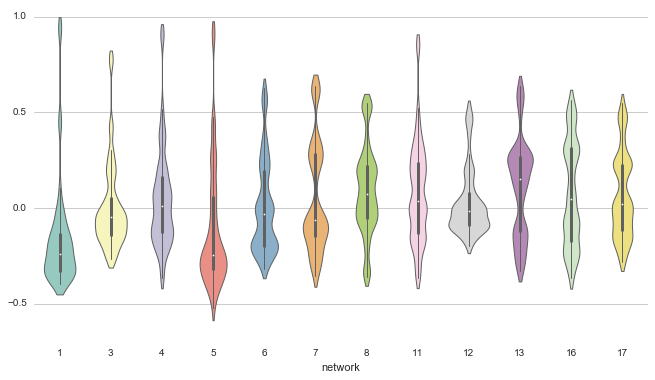

In [2]:
# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 6))

# Draw a violinplot with a narrower bandwidth than the default
sns.violinplot(data=corr_df, palette="Set3", bw=.2, cut=1, linewidth=1)

# Finalize the figure
ax.set(ylim=(-.7, 1.05))
sns.despine(left=True, bottom=True)

In [11]:
corr_df

network                  1         3         4         5         6         7   \
network node hemi                                                               
1       1    lh    0.940758 -0.256174 -0.367388  0.425164 -0.057770 -0.275816   
             rh    0.940758 -0.256757 -0.335360  0.475935 -0.012364 -0.229890   
3       1    lh   -0.347179  0.776591  0.516095 -0.171081  0.195136  0.215233   
             rh   -0.165752  0.776591  0.328505 -0.098206  0.192752  0.133581   
4       1    lh   -0.353147  0.415503  0.907364 -0.234307  0.131866  0.366093   
             rh   -0.349601  0.429097  0.907364 -0.253040  0.087337  0.302202   
5       1    lh    0.431786 -0.129167 -0.230126  0.911449  0.275379 -0.103652   
             rh    0.469312 -0.140120 -0.257221  0.911449  0.267579 -0.108846   
6       1    lh   -0.060177  0.135988  0.157311  0.255603  0.573441  0.283326   
             rh    0.002677  0.187955  0.088655  0.401885  0.626314  0.320228   
        2    lh   -0.063111  0.198762  0.098668  0.167566  0.525855  0.280571   
             rh   -0.019657  0.253069  0.093774  0.260862  0.558416  0.255603   
7       1    lh   -0.308897  0.179203  0.446087 -0.231505  0.190905  0.619272   
             rh   -0.267666  0.302085  0.367882 -0.080596  0.322854  0.638759   
        2    lh   -0.363550  0.269359  0.386652 -0.193413  0.232189  0.589295   
             rh   -0.299915  0.195221  0.373569 -0.183673  0.238991  0.631601   
        3    lh   -0.169581  0.040143  0.209373 -0.023062  0.335749  0.630577   
             rh   -0.107509  0.060432  0.221321  0.074753  0.388904  0.609847   
8       1    lh   -0.362722 -0.041814  0.017239 -0.372297 -0.036357  0.242871   
             rh   -0.395465 -0.101148 -0.001599 -0.328916 -0.023428  0.278742   
        2    lh   -0.327407  0.042754  0.225405 -0.262639  0.013079  0.351678   
             rh   -0.351986 -0.050748  0.180573 -0.253869  0.018649  0.345331   
        3    lh   -0.328728  0.050446  0.191949 -0.386714 -0.091193  0.223598   
             rh   -0.346915 -0.055209  0.104059 -0.319216 -0.012644  0.259593   
11      1    lh   -0.390837 -0.165437 -0.113477 -0.326487 -0.151778 -0.016966   
             rh   -0.325613 -0.251598 -0.182579 -0.254397 -0.185779 -0.024879   
12      1    lh   -0.081245 -0.003014 -0.096756  0.065704 -0.016985 -0.082187   
             rh   -0.005003 -0.154205 -0.233232  0.271565  0.005511 -0.124928   
        2    lh   -0.144306 -0.104950 -0.093288  0.054061  0.017861 -0.063382   
             rh   -0.165468 -0.200529 -0.175035  0.118745  0.061267 -0.068240   
        3    lh    0.101941 -0.092667 -0.171226  0.274896  0.022077 -0.070303   
13      1    lh   -0.292910 -0.044116 -0.029003 -0.416276 -0.223246 -0.143748   
             rh   -0.302794 -0.185629 -0.110968 -0.353713 -0.249628 -0.152438   
        2    lh   -0.372171 -0.087494 -0.014240 -0.384041 -0.171167 -0.075785   
             rh   -0.366963 -0.224465 -0.082330 -0.307075 -0.175352 -0.133249   
        3    rh   -0.361620 -0.266432 -0.141589 -0.309276 -0.216471 -0.120135   
        4    rh   -0.127895 -0.152299 -0.149943 -0.061396 -0.215815 -0.239260   
16      1    lh   -0.277935 -0.044072  0.053009 -0.522852 -0.281449 -0.109069   
             rh   -0.254489 -0.123365  0.027710 -0.442857 -0.236872 -0.048568   
        2    lh   -0.207364 -0.085406 -0.117661 -0.382675 -0.303127 -0.312413   
             rh   -0.195588 -0.156142 -0.168529 -0.357103 -0.318181 -0.275175   
        3    lh   -0.319227 -0.009973  0.072408 -0.437266 -0.196470 -0.127336   
             rh   -0.140086 -0.127235 -0.198590 -0.147307 -0.212007 -0.324507   
        4    lh   -0.193345 -0.020757 -0.110339 -0.260617 -0.241499 -0.354396   
             rh   -0.255228 -0.169474 -0.041459 -0.305370 -0.250977 -0.191898   
17      1    lh   -0.156373 -0.045172 -0.117414 -0.187305 -0.207832 -0.268622   
             rh   -0.212282 -0.163731 -0.203751 -0.240847 -0.211418 -0.215853   
        2    lh   -0.239874 -0.